### Load the Data Set

In [3]:
from data_loader import load_data

data_dir = "data"
X, y = load_data(data_dir)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

Loading data from: data


Loading classes: 100%|████████████████████| 6/6 [00:04<00:00,  1.50it/s]


Successfully loaded 1200 images
Train: 768, Val: 192, Test: 240


### train model

In [ ]:
from cnn import CNN

model = CNN()
model.train(X_train,
            y_train,
            X_val,
            y_val,
            epochs=20,
            batch_size=32,
            learning_rate=0.001,
            checkpoint_dir="./checkpoints",
            checkpoint_freq=1)

test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

# Save the trained model
model_path = "./d3_cnn_model.pkl"
model.save_model(model_path)


training started ............

Processing Batch: 0 with batch size: 32
Processing Batch: 1 with batch size: 32
Processing Batch: 2 with batch size: 32


### resume trainig

In [ ]:
from cnn import CNN

model = CNN()
model.train(X_train,
            y_train,
            X_val,
            y_val,
            epochs=20,
            batch_size=32,
            learning_rate=0.0001,
            checkpoint_dir="./checkpoints",
            checkpoint_freq=1,
            resume_from="./checkpoints/epoch_20.ckpt")


test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")


model_path = "./d3_cnn_model.pkl"
model.save_model(model_path)

### Evaluate Model

In [6]:
from cnn import CNN

# model_path = "./d3_cnn_model.pkl"
model_path = "./checkpoints-20250519T113839Z-1-001/checkpoints/epoch_40.ckpt"

model = CNN()
model.load_model(model_path)


test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

Loaded checkpoint from epoch 40
Model loaded from ./checkpoints-20250519T113839Z-1-001/checkpoints/epoch_40.ckpt
Test Accuracy: 0.7250
Final Test Accuracy: 72.50%


['epoch_1.ckpt', 'epoch_2.ckpt', 'epoch_3.ckpt', 'epoch_4.ckpt', 'epoch_5.ckpt', 'epoch_6.ckpt', 'epoch_7.ckpt', 'epoch_8.ckpt', 'epoch_9.ckpt', 'epoch_10.ckpt', 'epoch_11.ckpt', 'epoch_12.ckpt', 'epoch_13.ckpt', 'epoch_14.ckpt', 'epoch_15.ckpt', 'epoch_16.ckpt', 'epoch_17.ckpt', 'epoch_18.ckpt', 'epoch_19.ckpt', 'epoch_20.ckpt', 'epoch_21.ckpt', 'epoch_22.ckpt', 'epoch_23.ckpt', 'epoch_24.ckpt', 'epoch_25.ckpt', 'epoch_26.ckpt', 'epoch_27.ckpt', 'epoch_28.ckpt', 'epoch_29.ckpt', 'epoch_30.ckpt', 'epoch_31.ckpt', 'epoch_32.ckpt', 'epoch_33.ckpt', 'epoch_34.ckpt', 'epoch_35.ckpt', 'epoch_36.ckpt', 'epoch_37.ckpt', 'epoch_38.ckpt', 'epoch_39.ckpt', 'epoch_40.ckpt']
1.8667231713152503
Loaded checkpoint from ./checkpoints-20250519T113839Z-1-001/checkpoints/epoch_1.ckpt
1.7267370232025367
Loaded checkpoint from ./checkpoints-20250519T113839Z-1-001/checkpoints/epoch_2.ckpt
1.6612415396655598
Loaded checkpoint from ./checkpoints-20250519T113839Z-1-001/checkpoints/epoch_3.ckpt
1.60171839519632

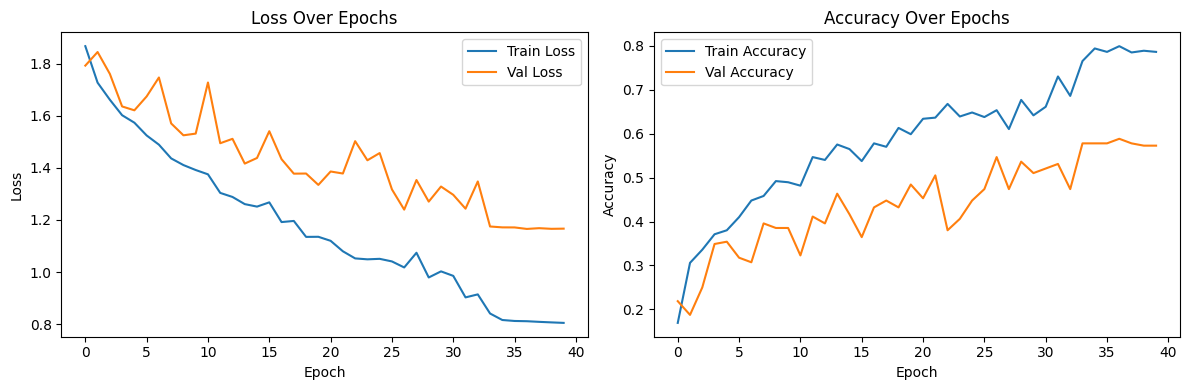

In [2]:
from cnn import CNN

model = CNN()
model.plot_training_history_from_dir("./checkpoints-20250519T113839Z-1-001/checkpoints")